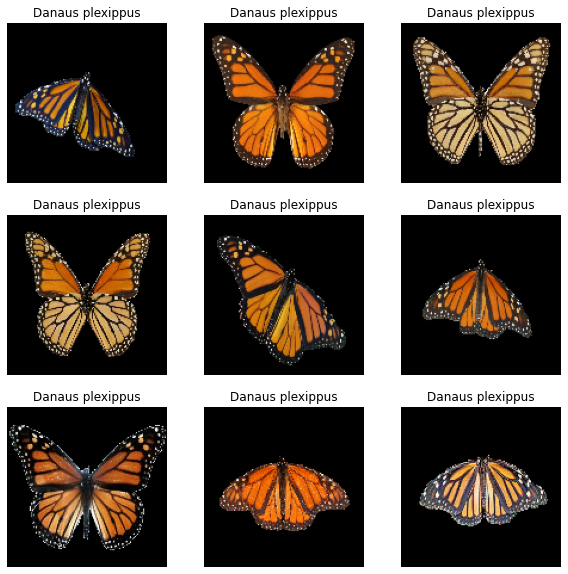

In [1]:
import os
import numpy as np
import tensorflow as tf
import time
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Makes one figure able to display multiple pictures
def display_multiple(images, titles, number = 1, rows = 1, cols=1):
    fig = plt.figure(figsize=(10, 10))
    for i in range(number):
        fig.add_subplot(rows, cols, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
        plt.title(titles[i])

# All the butterfly-types in the dataset
types = ['Danaus plexippus',
         'Heliconius charitonius',
         'Heliconius erato',
         'Junonia coenia',
         'Lycaena phlaeas',
         'Nymphalis antiopa',
         'Papilio cresphontes',
         'Pieris rapae',
         'Vanessa atalanta',
         'Vanessa cardui']
        
#
# Load data
#

image_data = np.load('./Data/RGB134x134InputImage.npy')
type_name_data = np.load('./Data/RGB134x134OutputType.npy')

# Generate index based on name, as model.fit cannot use string
l = []
for name in type_name_data:
    l.append(types.index(name))
type_index_data = np.asarray(l)

display_multiple(image_data, type_name_data, 9, 3, 3)

In [2]:
#
# Splitting and Preprocessing data
#

x_train, x_test, y_train, y_test = train_test_split(image_data, type_index_data, test_size=0.33)

x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.shape)
print(y_train.shape)

(557, 134, 134, 3)
(557,)


In [3]:
#
# LeNet Model
#

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=7, strides=2, activation='relu', padding="valid", input_shape=(134,134,3)),
    tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),
    
    tf.keras.layers.Conv2D(32, kernel_size=5, strides=1, activation='relu', padding="valid"),
    tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(32, kernel_size=5, strides=1, activation='relu', padding="valid",),
    tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),

    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='sigmoid'),
    tf.keras.layers.Dense(84, activation='sigmoid'),
    tf.keras.layers.Dense(10)

])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[
                  keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
                  keras.metrics.SparseTopKCategoricalAccuracy(3, name="top-3-accuracy")])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        4736      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0

Epoch 1/40
18/18 [==============================] - 5s 34ms/step - loss: 2.3494 - accuracy: 0.1005 - top-3-accuracy: 0.3034 - val_loss: 2.2662 - val_accuracy: 0.1382 - val_top-3-accuracy: 0.3745
Epoch 2/40
18/18 [==============================] - 0s 11ms/step - loss: 2.2111 - accuracy: 0.2136 - top-3-accuracy: 0.4883 - val_loss: 2.1694 - val_accuracy: 0.2618 - val_top-3-accuracy: 0.5055
Epoch 3/40
18/18 [==============================] - 0s 11ms/step - loss: 2.0218 - accuracy: 0.3429 - top-3-accuracy: 0.6840 - val_loss: 1.9413 - val_accuracy: 0.3527 - val_top-3-accuracy: 0.6873
Epoch 4/40
18/18 [==============================] - 0s 10ms/step - loss: 1.7834 - accuracy: 0.4273 - top-3-accuracy: 0.7917 - val_loss: 1.7041 - val_accuracy: 0.4509 - val_top-3-accuracy: 0.8109
Epoch 5/40
18/18 [==============================] - 0s 11ms/step - loss: 1.5913 - accuracy: 0.4847 - top-3-accuracy: 0.8366 - val_loss: 1.5566 - val_accuracy: 0.5127 - val_top-3-accuracy: 0.8255
Epoch 6/40
18/18 [=======

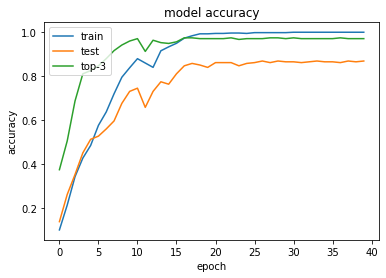

In [4]:
#
# Fit and Test
#

start = time.time()

history = model.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test))

training_time = time.time() - start


test_loss, test_acc, top_3_accuracy = model.evaluate(x_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc)
print('\Training time in seconds:', training_time)
print(f"Test top 3 accuracy: {round(top_3_accuracy * 100, 2)}%")


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_top-3-accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test', 'top-3'], loc='upper left')
plt.show()